In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_iris()

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
d = {
    'sepal length': data.data[50:, 1],
    'petal length': data.data[50:, 2],
    'Species': np.array([i for i in data.target if i>0])
}

In [6]:
df = pd.DataFrame(d)

In [7]:
df

,sepal length,petal length,Species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


In [8]:
#randomize the data
df = df.sample(df.shape[0])
df

,sepal length,petal length,Species
75,3.2,6.0,2
70,3.2,5.7,2
99,3.0,5.1,2
91,3.1,5.1,2
48,2.5,3.0,1
...,...,...,...
16,3.0,4.5,1
9,2.7,3.9,1
79,3.0,5.8,2
50,3.3,6.0,2


In [9]:
df_train = df.iloc[:60, :].sample(10)
df_train

,sepal length,petal length,Species
82,2.8,5.6,2
75,3.2,6.0,2
19,2.5,3.9,1
20,3.2,4.8,1
98,3.4,5.4,2
86,3.4,5.6,2
24,2.9,4.3,1
29,2.6,3.5,1
51,2.7,5.1,2
56,2.5,4.5,2


In [10]:
df_test = df.iloc[61:, :].sample(10)

In [11]:
df_tt = df_test.sample(5, replace = True)
X_test = df_tt.iloc[:, :-1].values
y_test = df_tt.iloc[:, -1].values

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

In [13]:
#Models -> randomsamples

def evaluate(model, X, y):
  model.fit(X,y)
  plot_tree(model)

  plt.show()
  plot_decision_regions(X, y, model, legend = 2)
  plt.show()

  y_pred = model.predict(X_test)

  print("y_test: ", y_test)
  print("y_pred: ", y_pred)

  print(accuracy_score(y_test, y_pred))

  return model


first tree

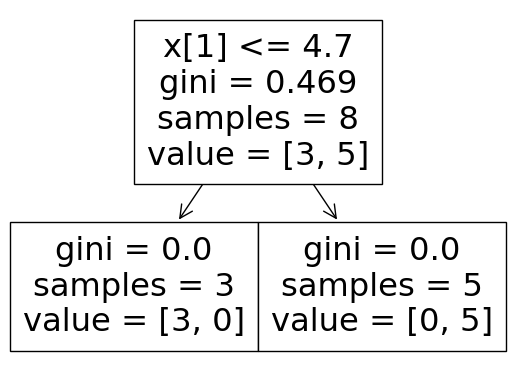

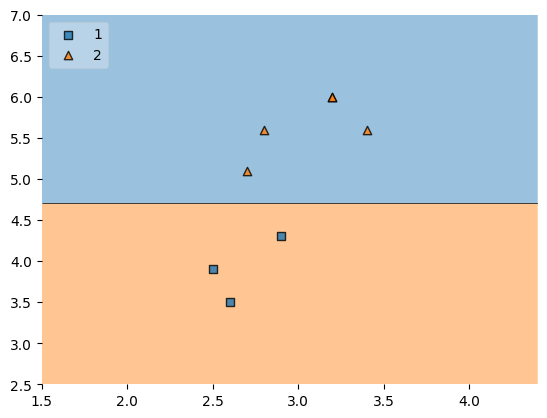

y_test:  [2 1 2 2 2]
y_pred:  [2 1 2 2 2]
1.0


In [14]:
df_t = df_train.sample(8, replace = True)

X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values
dt = DecisionTreeClassifier()

bag1 = evaluate(dt, X_train, y_train)

Second Tree

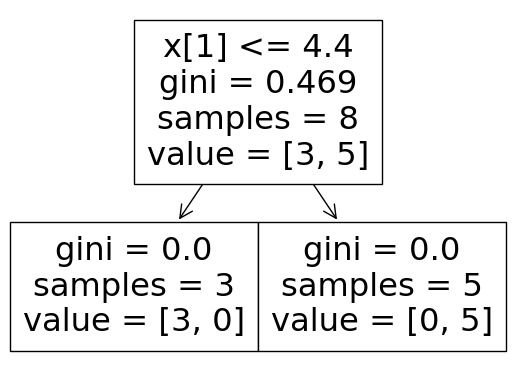

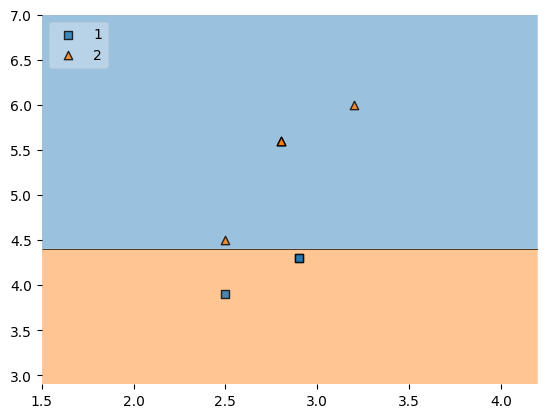

y_test:  [2 1 2 2 2]
y_pred:  [2 2 2 2 2]
0.8


In [15]:
df_t = df_train.sample(8, replace = True)

X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values
dt = DecisionTreeClassifier()

bag2 = evaluate(dt, X_train, y_train)

Thrid Tree

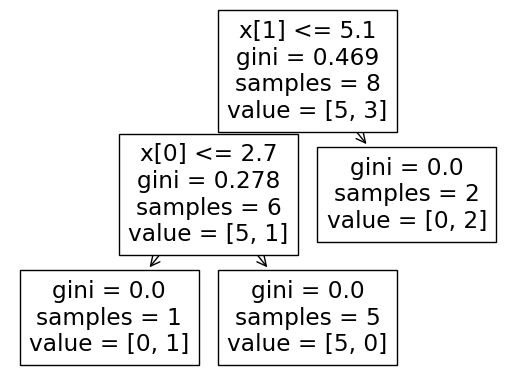

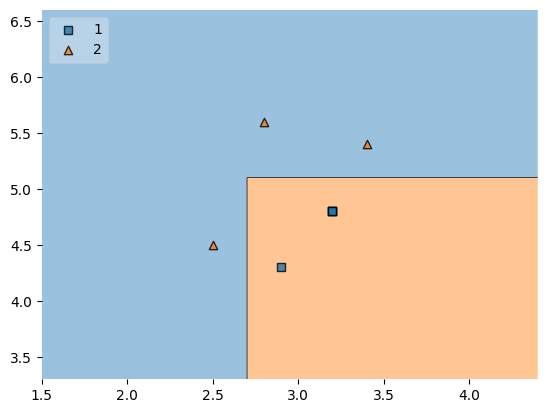

y_test:  [2 1 2 2 2]
y_pred:  [2 1 2 2 2]
1.0


In [16]:
df_t = df_train.sample(8, replace = True)

X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values
dt = DecisionTreeClassifier()

bag3 = evaluate(dt, X_train, y_train)

Aggregation - giving vote

In [17]:
print("prediction 1: ", bag1.predict(np.array([2.9, 6.6]).reshape(1,2)))
print("prediction 2: ", bag2.predict(np.array([2.9, 6.6]).reshape(1,2)))
print("prediction 3: ", bag3.predict(np.array([2.9, 6.6]).reshape(1,2)))

prediction 1:  [2]
prediction 2:  [2]
prediction 3:  [2]


**Stacking Technique**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = MultinomialNB()
m4 = GaussianNB()
m5 = DecisionTreeClassifier()

In [21]:
from sklearn.ensemble import VotingClassifier

In [22]:
model = VotingClassifier([('knn', m1), ('lr', m2), ('mn', m3), ('gn', m4), ('dt', m5)])

In [23]:
df

,sepal length,petal length,Species
75,3.2,6.0,2
70,3.2,5.7,2
99,3.0,5.1,2
91,3.1,5.1,2
48,2.5,3.0,1
...,...,...,...
16,3.0,4.5,1
9,2.7,3.9,1
79,3.0,5.8,2
50,3.3,6.0,2


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size = 0.33, random_state = 42)
#X_train = df.iloc[:, :-1]
#y_train = df.iloc[:, -1]

In [28]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('mn', MultinomialNB()), ('gn', GaussianNB()),
                             ('dt', DecisionTreeClassifier())])

In [29]:
model.score(X_train, y_train)

0.9104477611940298

In [30]:
model.score(X_test, y_test)

0.9393939393939394

**Boosting**

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
#adaboost performs only binary classification

ada = AdaBoostClassifier(n_estimators = 4, random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [33]:
y_pred = ada.predict(X_test)

In [34]:
ada.score(X_test, y_test)

0.9393939393939394

In [35]:
accuracy_score(y_test, y_pred)

0.9393939393939394